# Email Spam Detection using ML

## Importing necessary libraries

In [86]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [87]:
data = pd.read_csv("spam.csv", encoding='latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


### Data Preparation

In [88]:
column_to_delete=[name for name in data.columns if name.startswith('Unnamed')]
data.drop(columns=column_to_delete,inplace=True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [89]:
data.shape

(5572, 2)

In [90]:
data.rename(columns=dict({"v1":"target","v2":"message"}),inplace=True)

In [91]:
data.isnull().sum()

target     0
message    0
dtype: int64

In [92]:
print(f"Total duplicate records in dataset are : {data.duplicated().sum()}")

Total duplicate records in dataset are : 403


In [93]:
data.drop_duplicates(inplace=True)
len(data)

5169

In [94]:
data.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Data Preprocessing

#### 1. LowerCasing

In [95]:
data["message"] = data["message"].str.lower()
data.head()

,target,message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


#### 2. Tokenization

In [96]:
from nltk.tokenize import word_tokenize

# Tokenize the email text
data["tokens"] = data["message"].apply(word_tokenize)
data.head()

,target,message,tokens
0,ham,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy, .., avail..."
1,ham,ok lar... joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor, ..., u, c, alrea..."
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, i, do, n't, think, he, goes, to, usf, ,,..."


#### 3. Stop Words Removal

In [97]:
from nltk.corpus import stopwords

def remove_stop_words(text):
    stop_words = set(stopwords.words("english"))
    words = text.split()  # Split the text into words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Apply stop words removal to the "message" column
data['message_without_stopwords'] = data['message'].apply(remove_stop_words)

data.head()

,target,message,tokens,message_without_stopwords
0,ham,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy, .., avail...","go jurong point, crazy.. available bugis n gre..."
1,ham,ok lar... joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]",ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor, ..., u, c, alrea...",u dun say early hor... u c already say...
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, i, do, n't, think, he, goes, to, usf, ,,...","nah think goes usf, lives around though"


#### 4. Punctuation and Special Characters Removal:

In [98]:
import re
def remove_punctuation(text):
    # Use regular expressions to remove punctuation and special characters
    cleaned_text = re.sub(r'[^\w\s-]', '', text)
    return cleaned_text

data['message_cleaned'] = data['message_without_stopwords'].apply(remove_punctuation)

In [99]:
data.head()

,target,message,tokens,message_without_stopwords,message_cleaned
0,ham,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy, .., avail...","go jurong point, crazy.. available bugis n gre...",go jurong point crazy available bugis n great ...
1,ham,ok lar... joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]",ok lar... joking wif u oni...,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",free entry 2 wkly comp win fa cup final tkts 2...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor, ..., u, c, alrea...",u dun say early hor... u c already say...,u dun say early hor u c already say
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, i, do, n't, think, he, goes, to, usf, ,,...","nah think goes usf, lives around though",nah think goes usf lives around though


#### 5. Stemming or Lemmatization (using NLTK)

In [100]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def stem_text(text):
    words = nltk.word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

def lemmatize_text(text):
    words = nltk.word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

data['message_stemmed'] = data['message_cleaned'].apply(stem_text)
data['message_lemmatized'] = data['message_stemmed'].apply(lemmatize_text)
data.head()

,target,message,tokens,message_without_stopwords,message_cleaned,message_stemmed,message_lemmatized
0,ham,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, ,, crazy, .., avail...","go jurong point, crazy.. available bugis n gre...",go jurong point crazy available bugis n great ...,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...
1,ham,ok lar... joking wif u oni...,"[ok, lar, ..., joking, wif, u, oni, ...]",ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joke wif u oni,ok lar joke wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",free entry 2 wkly comp win fa cup final tkts 2...,free entry 2 wkly comp win fa cup final tkts 2...,free entri 2 wkli comp win fa cup final tkt 21...,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor, ..., u, c, alrea...",u dun say early hor... u c already say...,u dun say early hor u c already say,u dun say earli hor u c alreadi say,u dun say earli hor u c alreadi say
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, i, do, n't, think, he, goes, to, usf, ,,...","nah think goes usf, lives around though",nah think goes usf lives around though,nah think goe usf live around though,nah think goe usf live around though


In [101]:
#dropping the unecessary columns
data.drop(columns=["message", "message_without_stopwords", "message_cleaned", "message_stemmed"],inplace=True)
data.head()

,target,tokens,message_lemmatized
0,ham,"[go, until, jurong, point, ,, crazy, .., avail...",go jurong point crazi avail bugi n great world...
1,ham,"[ok, lar, ..., joking, wif, u, oni, ...]",ok lar joke wif u oni
2,spam,"[free, entry, in, 2, a, wkly, comp, to, win, f...",free entri 2 wkli comp win fa cup final tkt 21...
3,ham,"[u, dun, say, so, early, hor, ..., u, c, alrea...",u dun say earli hor u c alreadi say
4,ham,"[nah, i, do, n't, think, he, goes, to, usf, ,,...",nah think goe usf live around though


In [102]:
def target_mapping(text):
    if text=="spam":
        return 0
    else:
        return 1

data['target'] = data['target'].apply(target_mapper)
data.head()

,target,tokens,message_lemmatized
0,1,"[go, until, jurong, point, ,, crazy, .., avail...",go jurong point crazi avail bugi n great world...
1,1,"[ok, lar, ..., joking, wif, u, oni, ...]",ok lar joke wif u oni
2,0,"[free, entry, in, 2, a, wkly, comp, to, win, f...",free entri 2 wkli comp win fa cup final tkt 21...
3,1,"[u, dun, say, so, early, hor, ..., u, c, alrea...",u dun say earli hor u c alreadi say
4,1,"[nah, i, do, n't, think, he, goes, to, usf, ,,...",nah think goe usf live around though


### Wordcloud for spam messages

In [103]:
from wordcloud import WordCloud
wc=WordCloud(width=1000,height=1000,min_font_size=8,background_color='white')

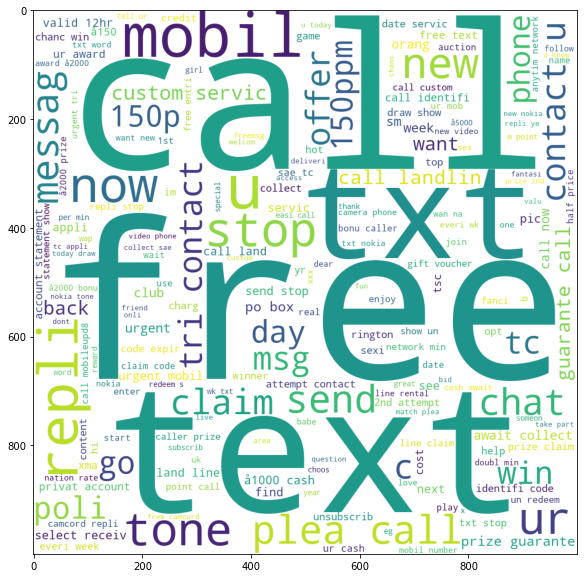

In [104]:
spam_wc=wc.generate(data[data["target"]==0]["message_lemmatized"].str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)
plt.show()

### Wordcloud for not spam messages

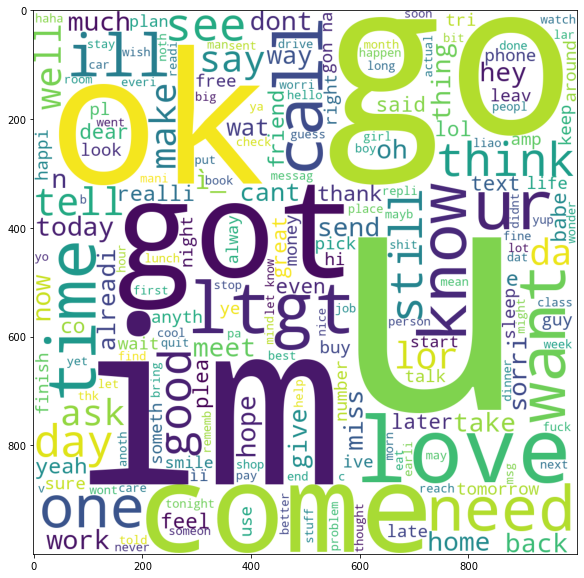

In [105]:
spam_wc=wc.generate(data[data["target"]==1]["message_lemmatized"].str.cat(sep=" "))
plt.figure(figsize=(20,10))
plt.imshow(spam_wc)
plt.show()

#### Most Commonly used words in spams

In [106]:
from collections import Counter

spam=list()
for msg in data[data['target']==0]["message_lemmatized"].to_list():
    for word in msg.split():
        spam.append(word)
        
spam_top20=pd.DataFrame(Counter(spam).most_common(20))
print(spam_top20)


         0    1
0     call  320
1     free  188
2        2  155
3      txt  137
4        u  130
5     text  121
6       ur  119
7    mobil  114
8     stop  103
9    repli  100
10   claim   98
11       4   97
12   prize   82
13     now   77
14     get   73
15     new   64
16  servic   64
17    tone   62
18    send   59
19  urgent   58


#### Most Commonly used words in spams

In [107]:
ham=list()
for msg in data[data['target']==1]["message_lemmatized"].to_list():
    for word in msg.split():
        ham.append(word)
        
ham_top20=pd.DataFrame(Counter(ham).most_common(20))
print(ham_top20)

       0    1
0      u  927
1     im  435
2     go  401
3    get  352
4      2  288
5   come  272
6   ltgt  254
7     ok  245
8    got  237
9   like  232
10  know  232
11  call  232
12  love  210
13  time  209
14  want  208
15   ill  206
16  good  206
17    ur  197
18   day  192
19  need  171


## Testing and Training

Here we use Multinomial Naive Bayes Classifier Model.

In [108]:
X = data["message_lemmatized"]
y = data["target"]

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [110]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [111]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [112]:
y_pred = nb_classifier.predict(X_test_tfidf)

In [113]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.950354609929078


In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79       220
           1       0.95      1.00      0.97      1331

    accuracy                           0.95      1551
   macro avg       0.97      0.82      0.88      1551
weighted avg       0.95      0.95      0.95      1551



### Visualising using Pie Chart

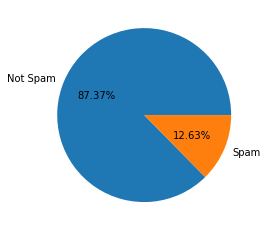

In [115]:
plt.pie(y.value_counts().values,labels=["Not Spam","Spam"],autopct="%0.2f%%")
plt.show()